In [46]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-darkgrid")

In [47]:
# setup supervised dataset
X = np.arange(-10,10,0.1)

np.random.shuffle(X)

Y_actual = (-2 * (X ** 2)) - X + 2

In [48]:
# split the dataset into training and testing
def split_dataset(X, Y, train_percent=70):
    idx = int((len(X) * train_percent) / 100)

    X_train, Y_train = X[:idx], Y[:idx]
    X_test, Y_test = X[idx:], Y[idx:]

    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split_dataset(X, Y_actual, train_percent=80)

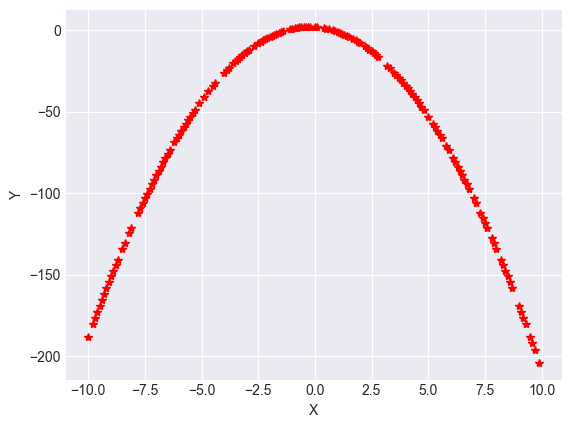

In [49]:
# plot graph for training data
plt.figure()
plt.plot(X_train, Y_train, "*", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

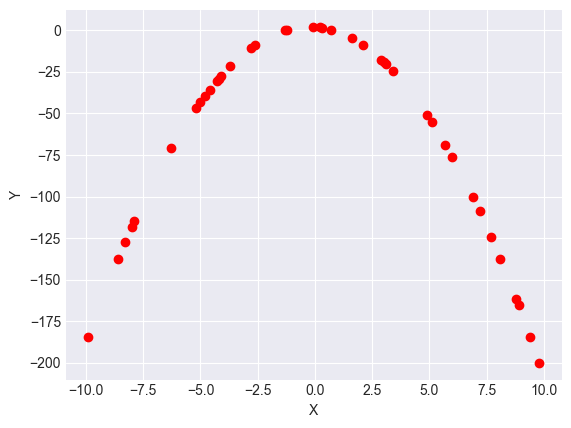

In [50]:
# plot graph for test data
plt.figure()
plt.plot(X_test, Y_test, "o", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [51]:
def make_random_start(total_nums, seed=42):

    np.random.seed(seed)
    return np.random.rand(total_nums)

In [52]:
def prediction(X, params):

    Y_pred = params[0] + (params[1] * X) + (params[2] * (X ** 2))
    return Y_pred

In [55]:
def training(X, Y, lr=0.1, epochs=1000000):

    params = make_random_start(3)
    cost_per_epoch = []

    for _ in range(epochs):

        cost = 0
        dJ_dtheta0, dJ_dtheta1, dJ_dtheta2 = 0.0, 0.0, 0.0

        for i in range(len(X)):
            Y_pred = prediction(X[i], params)
            error = Y_pred - Y[i]
            cost += abs(error)

            if error > 0:
                dJ_dtheta0 += 1
                dJ_dtheta1 += X[i]
                dJ_dtheta2 += X[i]**2
            elif error < 0:
                dJ_dtheta0 += -1
                dJ_dtheta1 += -X[i]
                dJ_dtheta2 += -(X[i] ** 2)
        
        # average cost
        cost /= len(X)
        cost_per_epoch.append(cost)

        params[0] = params[0] - ((lr * dJ_dtheta0) / len(X))
        params[1] = params[1] - ((lr * dJ_dtheta1) / len(X))
        params[2] = params[2] - ((lr * dJ_dtheta2) / len(X))
    
    return params, cost_per_epoch

[ 2.00454012 -0.46628569  0.56951894]


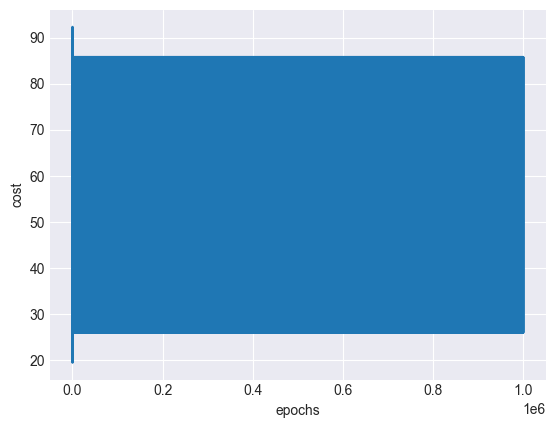

In [56]:
params, cost_per_epoch = training(X_train, Y_train)
print(params)
plt.figure()
plt.plot(cost_per_epoch,"*", color="red")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

In [58]:
def training(X, Y, lr=0.1, epochs=1000000):

    params = make_random_start(3)
    cost_per_epoch = []

    for _ in range(epochs):

        cost = 0
        dJ_dtheta0, dJ_dtheta1, dJ_dtheta2 = 0.0, 0.0, 0.0

        for i in range(len(X)):
            Y_pred = prediction(X[i], params)
            error = Y_pred - Y[i]
            cost += abs(error)

            if error > 0:
                dJ_dtheta0 += 1
                dJ_dtheta1 += X[i]
                dJ_dtheta2 += X[i]**2
            else:
                dJ_dtheta0 += -1
                dJ_dtheta1 += -X[i]
                dJ_dtheta2 += -(X[i] ** 2)
        
        # average cost
        cost /= len(X)
        cost_per_epoch.append(cost)

        params[0] = params[0] - ((lr * dJ_dtheta0) / len(X))
        params[1] = params[1] - ((lr * dJ_dtheta1) / len(X))
        params[2] = params[2] - ((lr * dJ_dtheta2) / len(X))
    
    return params, cost_per_epoch

[ 2.00454012 -0.46628569  0.56951894]


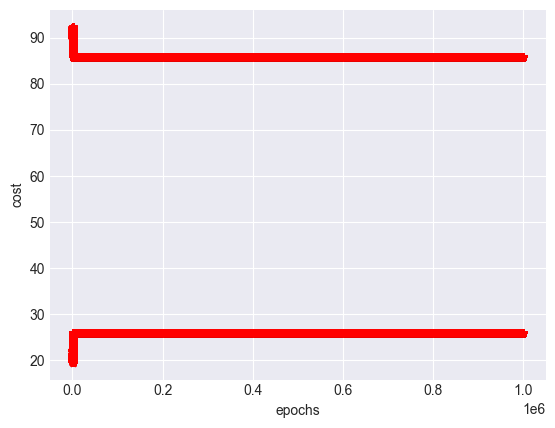

In [59]:
params, cost_per_epoch = training(X_train, Y_train)
print(params)
plt.figure()
plt.plot(cost_per_epoch,"*", color="red")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()